# 과제1_선형회귀분석
- y : [40,83,62,48,58,43]
- x : [13,19,16,14,15,14 ]
- 산점도를 그리시오
- SCORE, MSE, RMSE 결과값을 출력하시오

In [4]:
#python package 가져오기 및 matplotlib 출력 옵션 설정
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [5]:
# 데이터 만들기
data = {'x' : [13,19,16,14,15,14 ], 'y' : [40,83,62,48,58,43] }
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


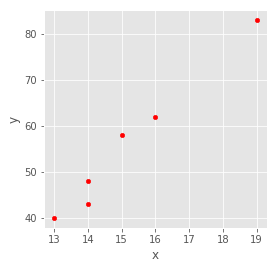

In [11]:
# 산점도로 나타내기
data.plot(kind= "scatter", x = 'x', y='y', figsize= (4,4), color = "red")

In [23]:
# 데이터 학습시키기
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data["x"]), y = data["y"])
prediction = linear_regression.predict(X= pd.DataFrame(data["x"]))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -55.48175182481753
b value =  [7.32846715]


In [25]:
# 적합도 검증
residuals = data["y"] - prediction
residuals.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [26]:
#적합도 검증
SSE = (residuals**2).sum() #오차제곱합
SST = ((data["y"] - data["y"].mean())**2).sum()
R_squard =  1 - (SSE/SST)
print('R_squard = ', R_squard)

R_squard =  0.9753156179610034


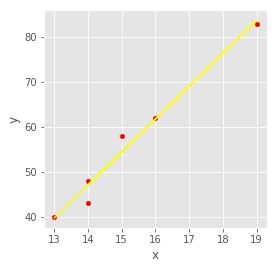

In [30]:
#예측하여 플롯으로 나타내기
data.plot(kind= "scatter", x = 'x', y='y', figsize= (4,4), color = "red")
plt.plot(data["x"], prediction, color= "yellow")

In [33]:
#성능평가하기
from sklearn.metrics import mean_squared_error

print('R = ', linear_regression.score(X = pd.DataFrame(data["x"]), y = data["y"]))

print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

R =  0.9753156179610034
Mean_Squared_Error =  5.172749391727503
RMSE =  2.2743679103714736


# 과제2_다중선형회귀분석

In [1]:
#python package 가져오기 및 matplotlib 출력 옵션 설정
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
# 데이터 만들기
data = {'x1' : [13,18,17,20,22,21 ], 
        'x2' : [9,7,17,11,8,10],
        'y' : [20,22,30,27,35,32] }
data = pd.DataFrame(data)
x = data[['x1','x2']] #단일회귀분석과의 차이점 데이터 x와 y를 구분함
y = data['y']
data

,x1,x2,y
0,13,9,20
1,18,7,22
2,17,17,30
3,20,11,27
4,22,8,35
5,21,10,32


In [6]:
# 데이터 학습시키기
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(x), y =  y) #단일회귀분석과의 차이점: 위에서 x, y를 지정해 줬기 때문에
prediction = linear_regression.predict(X= pd.DataFrame(x)) # x, y 만 써도 된다
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_) # 독립변수 개수가 2개 나온다

a value =  -7.35920177383591
b value =  [1.5443459  0.62472284]


In [7]:
# 적합도 검증
residuals = y - prediction
residuals.describe()

count    6.000000e+00
mean    -4.144833e-15
std      2.622371e+00
min     -3.399667e+00
25%     -1.987805e+00
50%      5.828714e-01
75%      1.415327e+00
max      3.385809e+00
Name: y, dtype: float64

In [9]:
#적합도 검증
SSE = (residuals**2).sum() #오차제곱합
SST = (( y - y.mean())**2).sum()
R_squard =  1 - (SSE/SST)
print('R_squard = ', R_squard)

R_squard =  0.7969440176685232


In [10]:
#성능평가하기
from sklearn.metrics import mean_squared_error

print('score = ', linear_regression.score(X = pd.DataFrame(x), y = y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5) #오차가 작다

score =  0.7969440176685232
Mean_Squared_Error =  5.730691056910565
RMSE =  2.393886182948255
